In [104]:
import mnist_loader
import network
import numpy as np
from matplotlib import pyplot as plt

In [103]:
training_data, validation_data, test_data,train_ae,val_ae,test_ae = mnist_loader.load_data_wrapper(make_binary =True)

In [105]:
net = network.Network([784, 30, 10], cost=network.CrossEntropyCost)
net.large_weight_initializer()
net.SGD(training_data, 5, 10, 0.5)


Epoch 0 training complete

Epoch 1 training complete

Epoch 2 training complete

Epoch 3 training complete

Epoch 4 training complete



([], [], [], [])

In [106]:
test_in = np.transpose([np.squeeze(i[0]) for i in test_data])
posteriors = net.feedforward(test_in)
test_pred = np.argmax(posteriors,0)

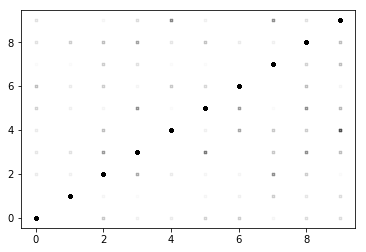

In [107]:
test_out = [i[1] for i in test_data]
plt.plot(test_out,test_pred,'k.',alpha=.01)
plt.show()

# Try autoendoder Network

In [108]:
net_ae = network.Network([784,30,5,30,784], cost=network.QuadraticCost)
net_ae.large_weight_initializer()
net_ae.SGD(train_ae, 10, 10, 0.5,evaluation_data=val_ae)

Epoch 0 training complete

Epoch 1 training complete

Epoch 2 training complete

Epoch 3 training complete

Epoch 4 training complete

Epoch 5 training complete

Epoch 6 training complete

Epoch 7 training complete

Epoch 8 training complete

Epoch 9 training complete



([], [], [], [])

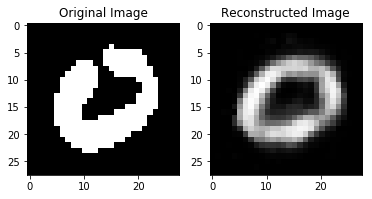

In [112]:
in_dat  = test_ae[25][0]
out_dat = net_ae.feedforward(in_dat)

plt.subplot(1,2,1)
plt.imshow(np.reshape(in_dat,(28,28)),cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(np.reshape(out_dat,(28,28)),cmap='gray')
plt.title('Reconstructed Image')
plt.show()


In [11]:
wts = net_ae.weights
bias = net_ae.biases
np.shape(wts[3]) # (4,): [0] (30,784), [1] (5,30), [2] (30,5), [3] (784,30)
np.shape(bias[3])# (4,):[0] (30,1), [1] (5,1), [2] (30,1), [3] (784,1)

(784, 1)

In [12]:
decoder_wts = wts[2:]
decoder_bias = bias[2:]
encoder_wts = wts[0:2]
encoder_bias = bias[0:2]
# print(np.shape(decoder_wts[1]))

def use_decode(wts,bias,a):
    for b, w in zip(bias, wts):
        print(np.shape(a))
        a = sigmoid(np.dot(w, a)+b)
        print(np.shape(a))
    return a

    return a    
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

(784, 1)
(30, 1)
(30, 1)
(5, 1)
(5, 1)
(30, 1)
(30, 1)
(784, 1)


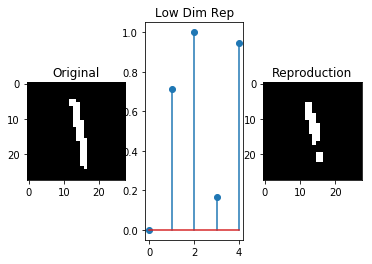

In [146]:
# in_probe = np.array([0, 0,0, 0, 0])
in_dat  = test_ae[31][0]
cent = use_decode(encoder_wts,encoder_bias,in_dat)
in_probe = cent
tmp_out = use_decode(decoder_wts,decoder_bias,in_probe)
tmp2 = np.sum(tmp_out,1)
tmp2 = (tmp2>.5)*1
np.shape(tmp2)

plt.subplot(1,3,1)
plt.imshow(np.reshape(in_dat,(28,28)),cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.stem(cent)
plt.title('Low Dim Rep')
plt.subplot(1,3,3)
plt.imshow(np.reshape(tmp2,(28,28)),cmap='gray')
plt.title('Reproduction')
plt.show()

# compute entropy

In [100]:
# now that it is binary simply compute 
foo = training_data
x = [i[0] for i in training_data]

np.shape(xx)
type(xx)
#cnts = np.unique(xx,axis=0,return_counts = True)

numpy.ndarray

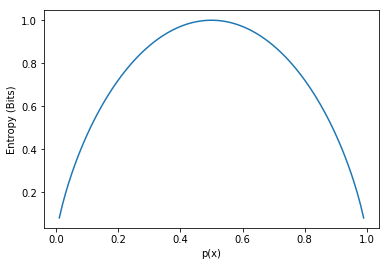

In [159]:
def bin_ent(p): return -(p*np.log2(p)+(1-p)*np.log2(1-p))
x = np.arange(0.01,1,.01)
plt.plot(x,bin_ent(x))
plt.xlabel('p(x)')
plt.ylabel('Entropy (Bits)')
plt.show()

In [158]:
help(np.log2)

Help on ufunc object:

log2 = class ufunc(__builtin__.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate arr

In [93]:
foo = list(map(lambda x:(x>.5)*1,t_in))

In [97]:
type(foo[0])

numpy.ndarray